In [1]:
import numpy as np
from sklearn.datasets import  load_iris

data = load_iris()
X = data.data
y = data.target


In [2]:
n_samples = X.shape[0]
n_train = n_samples //2 
n_test  = n_samples - n_train

train_index = range(0, n_train)
test_index = range(n_train, n_samples)


In [3]:
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
clf.score(X_train, y_train)

1.0

In [7]:
y_train, y_test

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [8]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,test_size=0.5, train_size=0.5,random_state=0)


In [9]:
train_index, test_index = next(ss.split(X))


In [10]:
ss.split(X_train)

<generator object BaseShuffleSplit.split at 0x7f6239e10970>

In [11]:
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [12]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
ss = ShuffleSplit(n_splits=10,
                  test_size=0.5, 
                  train_size=0.5, 
                  random_state=0)


In [14]:
next(ss.split(X))

(array([  3, 149,  98,   6,  68, 109,  96,  12, 102, 120, 104, 128,  46,
         11, 110, 124,  41, 148,   1, 113, 139,  42,   4, 129,  17,  38,
          5,  53, 143, 105,   0,  34,  28,  55,  75,  35,  23,  74,  31,
        118,  57, 131,  65,  32, 138,  14, 122,  19,  29, 130,  49, 136,
         99,  82,  79, 115, 145,  72,  77,  25,  81, 140, 142,  39,  58,
         88,  70,  87,  36,  21,   9, 103,  67, 117,  47]),
 array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
         54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
         44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
         92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
         56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
         89,  91, 125,  48,  13, 111,  95,  20,  15,  52]))

In [15]:
scores = []

for train_index, test_index in ss.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)


scores = np.array(scores)

print(scores)


[0.93333333 0.93333333 0.98666667 0.94666667 0.96       0.94666667
 0.97333333 1.         0.96       0.98666667]


In [16]:
import matplotlib.pyplot as plt


In [17]:
train_sizes = np.arange(0.1, 1, 0.1)

In [18]:
train_sizes 

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [20]:


all_mean = []
all_std = []


for train_size in train_sizes:
    
    ss = ShuffleSplit(n_splits=100, train_size=train_size, test_size=1-train_size)
    scores = []
    for train_index, test_index in ss.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)
    scores = np.array(scores)
    print("train_size {0:4.1f}%: {1:4.2f} +- {2:4.2f}".format(train_size,scores.mean(),scores.std()))    

    all_mean.append(scores.mean()*100)
    all_std.append(scores.std()*100)



train_size  0.1%: 0.87 +- 0.08
train_size  0.2%: 0.93 +- 0.04
train_size  0.3%: 0.95 +- 0.03
train_size  0.4%: 0.96 +- 0.02
train_size  0.5%: 0.96 +- 0.02
train_size  0.6%: 0.96 +- 0.02
train_size  0.7%: 0.96 +- 0.03
train_size  0.8%: 0.96 +- 0.03
train_size  0.9%: 0.97 +- 0.04


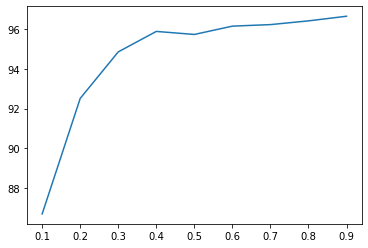

In [21]:
plt.plot(train_sizes, all_mean)


AttributeError: 'Line2D' object has no property 'yerr'

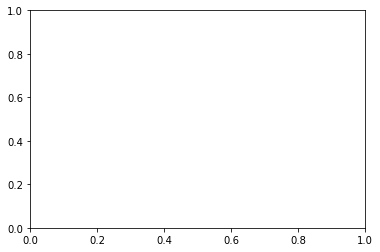

In [23]:
plt.plot(train_sizes, all_mean, yerr=all_std)


<ErrorbarContainer object of 3 artists>

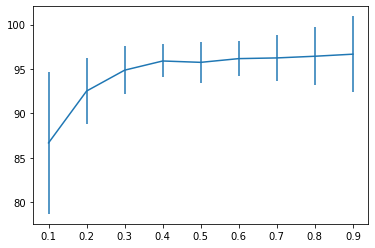

In [24]:
plt.errorbar(train_sizes, all_mean, yerr=all_std)
